# **Strategic Analysis of the Google Play Store Market** 
## **Google Play Store Data**
Web scraped data of 10k Play Store apps for analysing the Android market.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*Mq6uQqBbKgHCARL6w5_5mA.png" alt="Google play store apps data" width="700" height="300">


## *Objective*:
The primary goal of this project is to derive actionable business insights from the analysis of Google Play Store data. By understanding the app market dynamics, we can help app developers, marketers, and business leaders make informed decisions that align with market trends and consumer preferences.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer

## **Data Exploration**

In [2]:
# Import Required Libraries and Load the Data
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Get the shape of the data
df.shape

(10841, 13)

we have 10841 rows and 13 columns 

In [4]:
# Get some statistics about the data
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
# Get some information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### **Observation** 
- the dataset have 12 features with object datatype and 1 feature with float datatype.
- we need to convert features like : Reviews, Size, and price to numeric.
- we need to convert Last updated to datetime feature.
- the dataset have some nulls values in columns we need to deal with.

## **Data Cleaning**
- Fix datatypes for numerical features 
- Apply univariate analysis for categorical to check for any errors 
- Handling missing values 

### **Fix datatypes for numerical features**

**Reviews**

In [6]:
# display unique values for Reviews Feature
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [7]:
# convert Reviews feature to int

# search for string values in Reviews columns are not numeric
df.loc[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
# now fix datatype for the Reviews feature and convert any nonnumeric value to nan
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

In [9]:
df["Reviews"]

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

**Size**

In [10]:
# size feature
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Size feature cleaning process**

- If you notice, the `size` column contains values like `38M`, `7.4M`, and `525k`.  
- Some application sizes are in megabytes, while others are in kilobytes.
- There is a value `1,000+` we need to convert it to `1` Megabytes 
- There is a value `Varies with device` we need to replace it with 
- All we need to do is : 
    - we need to make all size feature in Megabytes 
    - so We will remove `M` letter and convert it to float 
    - then remove `K` letter and convert it to float then convert it to Megabytes by divide the value by 1024
    - 1 MB = 1024 kB




In [11]:
def fixing_size(size_value):
    """
    This function will clean every value in Size feature and then convert it as float
    and if the value in kilobytes we will convert it to Megabyte
    """
    try:
        # check if the value ends with "M"
        if size_value.endswith("M"):
            return float(size_value[:-1])
        # check if the value ends with "k" and then convert it to Megabytes
        elif size_value.endswith("k"):
            return float(size_value[:-1]) / 1024
        # check if the value equal 1,000+ and replace it with 1.0 Megabytes
        elif size_value == "1,000+":
            return 1.0
        # anything else return nan value
        else:
            return np.nan
    except:
        return np.nan

In [12]:
# now apply the function on the Size feature
df["Size"] = df["Size"].apply(fixing_size)
df["Size"]

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64

**Price**

In [13]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

**Price feature cleaning process**
- Remove all `$` signs from the values 
- consider that `Everone` Value means that this app is free so it's price is `0.0`
- After that we convert the feature to float 



In [14]:
# replace $ sign with nothing
df["Price"] = df.loc[:, "Price"].str.replace("$", "")
# replace Everone vlaue with 0.0
df["Price"] = df.loc[:, "Price"].str.replace("Everyone", "0")

In [15]:
# check
df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [16]:
# Now, convert to float datatype
df["Price"] = df["Price"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


#### **we need to explore data to see if something else need clean**

In [17]:
# let's get some statististics
df.describe()

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


#### **Observation** 
- The maximum value in `Rating` is 19 and that is outlier
- we all now that the maximum value of rating must be 5 
- so let's explore this example 

In [18]:
# display all example in our dataset that have rating above 5
df[df["Rating"] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
# drop this row
idx = df[df["Rating"] > 5].index
df.drop(idx, axis=0, inplace=True)

In [20]:
# explore
df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


#### Now the Rating is correct

### **Apply univariate analysis for categorical data to check for errors**

In [21]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [22]:
# explore unique values in Category feature
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [23]:
# explore unique values in Installs feature
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [24]:
# explore unique values in Type feature
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

The missing values we will treat with them after this stage 

In [25]:
# explore unique values in Content Rating feature
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

All most every thing is good 

**Based on the `questions` we are trying to answer, there are some columns we don't need them so let's Drop from our dataframe**


```
columns = ['Genres', 'Last Updated', 'Current Ver']
```


In [26]:
df.drop(columns=["Genres", "Last Updated", "Current Ver"], axis=1, inplace=True)

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up


### **Handling Missing Values**

In [28]:
# check the missing values in our dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Android Ver          2
dtype: int64

In [29]:
# let's see what happened if we drop them
df.dropna(axis=0).shape

(7727, 10)

If we drop all missing values we will lose a big part from the data, so let's impute them 

#### **Missing Values Imputation**

- Categorical data imputation with the most frequent value

In [30]:
# most frequent strategy for impute categorical missing value
imputer = SimpleImputer(strategy="most_frequent")

In [31]:
# Impute Type feature
df[["Type"]] = imputer.fit_transform(df[["Type"]])

In [32]:
# Impute Android ver feature
df[["Android Ver"]] = imputer.fit_transform(df[["Android Ver"]])

In [33]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Android Ver          0
dtype: int64

- Numerical data imputation with kNN imputation 

Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [34]:
# KNN Imputation
knn_imputer = KNNImputer()

In [35]:
# Impute Rating Feature
df[["Rating"]] = knn_imputer.fit_transform(df[["Rating"]])

In [36]:
# Impute Size Feature
df[["Size"]] = knn_imputer.fit_transform(df[["Size"]])

In [37]:
# Now check missing values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Android Ver       0
dtype: int64

Now we don't have any missing<p>
let's explore data after these imputations

In [38]:
df.describe()

,Rating,Reviews,Size,Price
count,10840.000000,1.084000e+04,10840.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.478907,2.927761e+06,20.747804,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.100000,3.800000e+01,5.900000,0.000000
50%,4.200000,2.094000e+03,18.000000,0.000000
75%,4.500000,5.477550e+04,26.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


## **Exploratory Data Analysis To Answer Client Questions**
### Key Business Questions Addressed

#### Pricing Strategy

1. **What is the most expensive app on the store?**
   - **Business Insight:** Identifying the highest-priced apps helps in understanding the upper pricing threshold. This can guide premium app developers on pricing strategies.

2. **What is the average price of apps for each genre with different install numbers?**
   - **Business Insight:** Understanding how pricing varies by genre and install count helps in setting competitive prices. For example, niche genres with high install numbers might allow for higher pricing due to their perceived value.

3. **How many apps have a rating > 4.7, and what is their average price?**
   - **Business Insight:** High-rated apps command higher trust and can potentially be priced higher. This insight helps in positioning premium, high-quality apps.

In [39]:
# display the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up


### 1. **What is the most expensive app on the store?**
   - **Business Insight:** Identifying the highest-priced apps helps in understanding the upper pricing threshold. This can guide premium app developers on pricing strategies.


In [40]:
most_five_expensive_apps = df.sort_values(by="Price", ascending=False).iloc[:5]
most_five_expensive_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,"10,000+",Paid,400.00,Everyone,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,"100,000+",Paid,399.99,Everyone,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.0,"1,000+",Paid,399.99,Everyone,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6.0,1.5,100+,Paid,399.99,Everyone,7.0 and up
5369,I am Rich,FINANCE,4.3,180.0,3.8,"5,000+",Paid,399.99,Everyone,4.2 and up


In [41]:
# To answer this question we need to know what is the app have the maximum price
max_price = df["Price"].max()
app = df[df["Price"] == max_price]["App"].values[0]
print(f"The Most expensive App is {app}")

The Most expensive App is I'm Rich - Trump Edition


#### The highest-priced app is `I'm Rich - Trump Edition` from  `life Style` Category.

### 2. **What is the average price of apps for each genre with different install numbers?**
   - **Business Insight:** Understanding how pricing varies by genre and install count helps in setting competitive prices. For example, niche genres with high install numbers might allow for higher pricing due to their perceived value.

In [42]:
categorys_installs_data = df.groupby(["Category", "Installs"], as_index= False)[["Price"]].mean()
categorys_installs_data.rename(columns={"Price" : "Avg Price"}, inplace= True)
categorys_installs_data.sort_values("Avg Price", ascending= False)

,Category,Installs,Avg Price
265,LIFESTYLE,0+,399.99
171,FINANCE,0+,212.99
298,MEDICAL,0+,200.00
377,PRODUCTIVITY,0+,154.99
138,EVENTS,1+,109.99
...,...,...,...
196,FOOD_AND_DRINK,5+,0.00
195,FOOD_AND_DRINK,"100,000+",0.00
194,FOOD_AND_DRINK,100+,0.00
193,FOOD_AND_DRINK,"10,000,000+",0.00


In [43]:
# let's select the top 15 and try to make a visualizatio
data =categorys_installs_data.sort_values("Avg Price", ascending= False)[:15]
data

,Category,Installs,Avg Price
265,LIFESTYLE,0+,399.990000
171,FINANCE,0+,212.990000
298,MEDICAL,0+,200.000000
377,PRODUCTIVITY,0+,154.990000
138,EVENTS,1+,109.990000
181,FINANCE,"5,000+",36.362727
173,FINANCE,"1,000+",30.148750
270,LIFESTYLE,"10,000+",27.084390
184,FINANCE,"50,000+",22.221667
23,AUTO_AND_VEHICLES,50+,9.990000


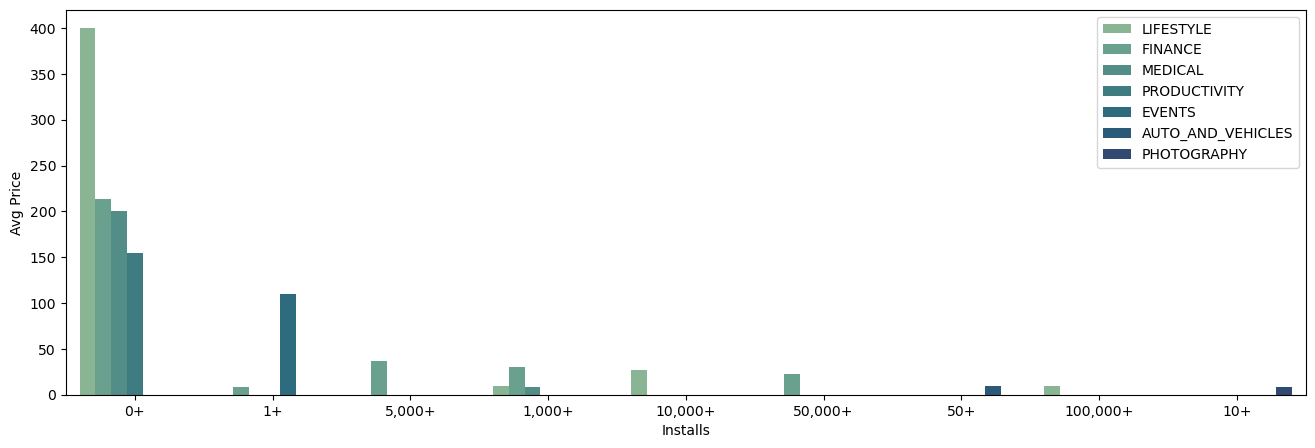

In [44]:
plt.figure(figsize=(16 , 5))
sns.barplot(data = data,
            x = "Installs", 
            y = "Avg Price",
            hue = "Category",
            palette= "crest")

plt.legend(loc = 'upper right')
plt.show()

Categories such as Lifestyle, Finance, Medical, and Productivity show high average prices in the lower install brackets (0+ and 1+ installs). This indicates that apps in these categories might be priced higher even if they don't attract a large number of installs, possibly due to their specialized or niche nature.

### 3. **How many apps have a rating > 4.7, and what is their average price?**
   - **Business Insight:** High-rated apps command higher trust and can potentially be priced higher. This insight helps in positioning premium, high-quality apps.

In [45]:
# find the apps which have rating greater than 4.7 
apps = df[df['Rating'] > 4.7]
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192.0,6.000000,"10,000+",Free,0.0,Everyone,3.0 and up
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479.0,33.000000,"100,000+",Free,0.0,Everyone,4.0 and up
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774.0,17.000000,"100,000+",Free,0.0,Everyone,4.2 and up
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090.0,27.000000,"100,000+",Free,0.0,Everyone,4.2 and up
70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,4.8,116986.0,35.000000,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...
10801,Fr Ignacio Outreach,FAMILY,4.9,52.0,19.000000,"1,000+",Free,0.0,Everyone,4.4 and up
10810,Fr Lupupa Sermons,BUSINESS,4.8,19.0,21.000000,100+,Free,0.0,Everyone,4.4 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22.0,8.600000,"1,000+",Free,0.0,Teen,4.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,0.604492,"1,000+",Free,0.0,Everyone,2.2 and up


In [46]:
# count the apps which have rating more than 4.7 and compute the avg price for them 
apps_count = apps["App"].count()
apps_count

595

In [47]:
avg_price = apps['Price'].mean()
avg_price

0.5018487394957983

**The number of apps have rating more than 4.7 is `595` app and the avg price of them is `$0.5018487394957983`**

## Market Segmentation

4. **Which Genre has more apps?**
   - **Business Insight:** Knowing the most crowded genres allows developers to identify saturated markets and potential areas for differentiation or untapped niches.

5. **How many apps are available for each content rating?**
   - **Business Insight:** Content rating distribution helps businesses tailor their apps to the appropriate audience, ensuring compliance and maximizing reach within target demographics.

6. **How many apps work on Android version 4?**
   - **Business Insight:** Understanding app compatibility with older Android versions helps businesses decide whether to support legacy systems or focus on newer OS versions.


### Which Genre has more apps?

In [48]:
# Grouping by category and count apps then sort values from max to min
df.groupby(["Category"])[["App"]].count().sort_values("App", ascending=False)

,App
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


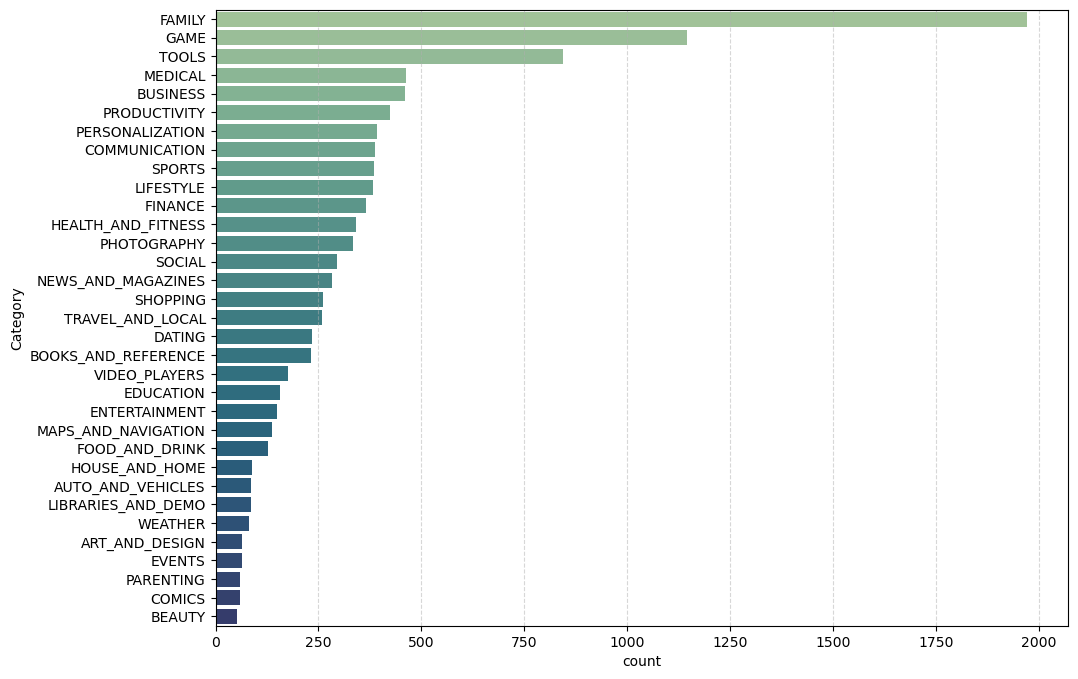

In [49]:
# Create a count plot with ordered bars
plt.figure(figsize=(11, 8))
sns.countplot(y="Category",
              data=df,
              order=df["Category"].value_counts().index,
              palette="crest")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

**So `Family Category` has more apps on the google play store** 

Apps from this categories are saturated markets and potential areas

How many apps for each type for each content reading?

In [64]:
df.groupby(["Content Rating", "Type"])[['App']].count()

App
Content Rating  Type      
Adults only 18+ Free     3
Everyone        Free  8019
                Paid   695
Everyone 10+    Free   381
                Paid    33
Mature 17+      Free   479
                Paid    20
Teen            Free  1156
                Paid    52
Unrated         Free     2

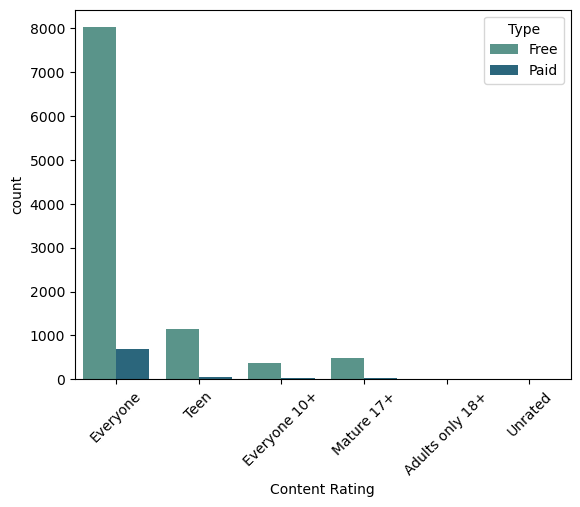

In [65]:
sns.countplot(x = "Content Rating",
            data= df,
            hue= "Type",
            palette= "crest"
        
            )
plt.xticks(rotation = 45)
plt.show()

### What is the average size of the free apps & paid apps?

In [44]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [45]:
# group data by Type then Compute the average size
df.groupby(["Type"])[["Size"]].mean()

,Size
Type,
Free,21.675505
Paid,19.516453


In [46]:
free_vs_paid = df.groupby(["Type"])[["Size"]].mean().reset_index()
free_vs_paid

,Type,Size
0,Free,21.675505
1,Paid,19.516453


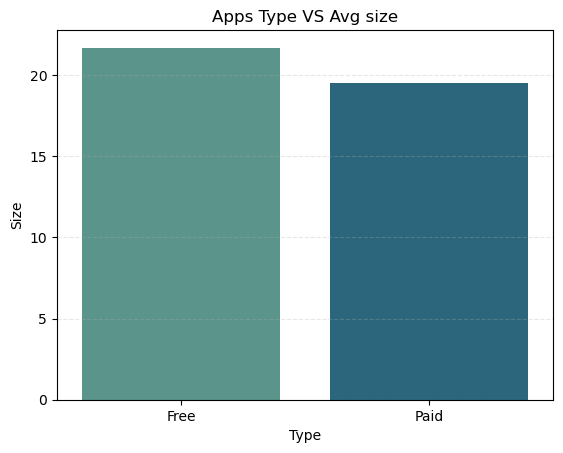

In [47]:
# Making a bar plot for the avg size per App
sns.barplot(x="Type", y="Size", data=free_vs_paid, palette="crest")
plt.title("Apps Type VS Avg size")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()

**The avg size for `Free` apps is `21.675505`, and for `Paid` is `19.516453`**

### What is the 5 top expenisve apps that has rate of 5?

In [48]:
most_five_expensive_apps_five_rated = df.sort_values(
    by=["Rating", "Price"], ascending=False
).iloc[:5]
most_five_expensive_apps_five_rated

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
5489,AP Art History Flashcards,FAMILY,5.0,1.0,96.000000,10+,Paid,29.99,Mature 17+,4.0 and up
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1.0,40.000000,10+,Paid,19.99,Everyone,2.2 and up
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1.0,63.000000,10+,Paid,4.99,Everyone,2.3 and up
5482,meStudying: AP English Lit,FAMILY,5.0,1.0,0.639648,10+,Paid,4.99,Everyone,2.0.1 and up
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1.0,27.000000,100+,Paid,4.99,Everyone,4.1 and up


In [49]:
# display them in the output
print("the 5 top expenisve apps that has rate of 5 are :".capitalize())
for app in most_five_expensive_apps_five_rated["App"]:
    print(app.capitalize())

The 5 top expenisve apps that has rate of 5 are :
Ap art history flashcards
Usmle step 2 ck flashcards
Hey aj! it's bedtime!
Mestudying: ap english lit
Ti-84 ce graphing calculator manual ti 84


### How many apps that has more than 50K reviews?

In [50]:
# filter the data to get only app has more than 50k reviews
df_more_than_50k_reviews = df[df["Reviews"] >= 50000]
df_more_than_50k_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.000000,"50,000,000+",Free,0.0,Teen,4.2 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,39.000000,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399.0,31.000000,"10,000,000+",Free,0.0,Everyone,4.1 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,21.516165,"10,000,000+",Free,0.0,Everyone,Varies with device
...,...,...,...,...,...,...,...,...,...,...
10796,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445.0,7.800000,"1,000,000+",Free,0.0,Everyone,4.1 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496.0,81.000000,"1,000,000+",Free,0.0,Teen,4.0 and up
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223.0,24.000000,"1,000,000+",Free,0.0,Everyone,4.1 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486.0,21.516165,"5,000,000+",Free,0.0,Mature 17+,Varies with device


In [51]:
df_more_than_50k_reviews["App"].count()

2782

**So the number of apps that has more than 50k reviews is `2782` app.**

### How much google earned from the 5,000,000+ installed apps?

In [58]:
# To answer this question we need to group the data by the Intalls and then sum the price 
df.groupby("Installs")['Price'].sum()

Installs
0                    0.00
0+                1205.41
1+                 179.29
1,000+            2662.56
1,000,000+          68.76
1,000,000,000+       0.00
10+                447.76
10,000+           2462.80
10,000,000+         14.97
100+               837.76
100,000+           861.45
100,000,000+         0.00
5+                  71.38
5,000+            1437.96
5,000,000+           0.00
50+                109.72
50,000+            603.85
50,000,000+          0.00
500+               134.62
500,000+            38.38
500,000,000+         0.00
Name: Price, dtype: float64

#### Observation
the apps with high number of installation can be free apps. so google don't earn from them 

### What is the max and min size for free and paid apps?

In [59]:
df.groupby("Type")["Size"].agg(['min', 'max'])

,min,max
Type,,
Free,0.008301,100.0
Paid,0.013672,100.0


Text(0, 0.5, 'Size')

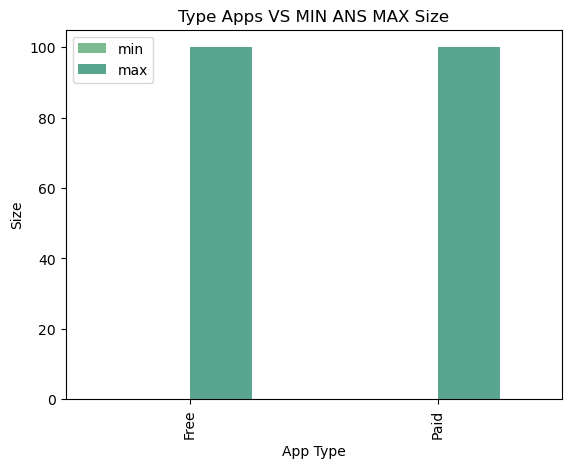

In [60]:
# VIsualize
sns.set_palette("crest")
df.groupby("Type")["Size"].agg(['min', 'max']).plot(kind= "bar")
plt.title("Type Apps VS MIN ANS MAX Size")
plt.xlabel("App Type")
plt.ylabel("Size")


Observation:
- The minmum size for free & paid type is almost zero 
- The maximum size for free & paid type is 100 MB

### is there a correlation between rating, Reviews, Size with the price of the app?

In [61]:
# get the correlation 
corr = df[["Rating",'Reviews', 'Size', 'Price']].corr()
corr

,Rating,Reviews,Size,Price
Rating,1.000000,0.068018,0.074864,-0.020190
Reviews,0.068018,1.000000,0.128255,-0.009667
Size,0.074864,0.128255,1.000000,-0.022995
Price,-0.020190,-0.009667,-0.022995,1.000000


In [62]:
corr['Price']

Rating    -0.020190
Reviews   -0.009667
Size      -0.022995
Price      1.000000
Name: Price, dtype: float64

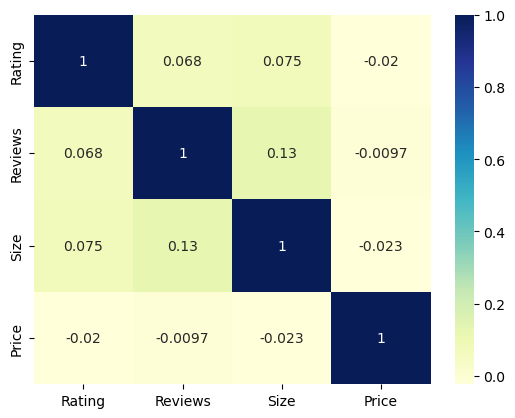

In [63]:
# visualize the heatmap 
# plt.style.use("seaborn-v0_8-bright")
sns.heatmap(corr , annot= True, cmap="YlGnBu")
plt.show()

Observation: 
These feature are not correlated with the price as we see

### How many apps that can work on android version 4?

In [66]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19.000000,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14.000000,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25.000000,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.800000,"100,000+",Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53.000000,"5,000+",Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.600000,100+,Free,0.0,Everyone,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.191757,3.0,9.500000,"1,000+",Free,0.0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,21.516165,"1,000+",Free,0.0,Mature 17+,Varies with device


In [67]:
# define function take the version and check if the version is 4 or not 
# and create a new featue by apply this function 

def check_version_4(version):
    try: 
        if version.startswith("4"):
            return "Yes"
        else:
            return "No"
    except :
        return np.nan

Now create new feature  `is_working_on_v4`

In [68]:
df['is_working_on_v4'] = df['Android Ver'].apply(check_version_4)

In [69]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,is_working_on_v4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19.000000,"10,000+",Free,0.0,Everyone,4.0.3 and up,Yes
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14.000000,"500,000+",Free,0.0,Everyone,4.0.3 and up,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,4.0.3 and up,Yes
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25.000000,"50,000,000+",Free,0.0,Teen,4.2 and up,Yes
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.800000,"100,000+",Free,0.0,Everyone,4.4 and up,Yes
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53.000000,"5,000+",Free,0.0,Everyone,4.1 and up,Yes
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.600000,100+,Free,0.0,Everyone,4.1 and up,Yes
10838,Parkinson Exercices FR,MEDICAL,4.191757,3.0,9.500000,"1,000+",Free,0.0,Everyone,2.2 and up,No
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,21.516165,"1,000+",Free,0.0,Mature 17+,Varies with device,No


In [71]:
apps_work_on_v4  = df[df['is_working_on_v4'] == 'Yes']
apps_work_on_v4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,is_working_on_v4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up,Yes
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up,Yes
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up,Yes
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up,Yes
...,...,...,...,...,...,...,...,...,...,...,...
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,4.191757,38.0,9.8,"5,000+",Free,0.0,Everyone,4.0 and up,Yes
10834,FR Calculator,FAMILY,4.000000,7.0,2.6,500+,Free,0.0,Everyone,4.1 and up,Yes
10835,FR Forms,BUSINESS,4.191757,0.0,9.6,10+,Free,0.0,Everyone,4.0 and up,Yes
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53.0,"5,000+",Free,0.0,Everyone,4.1 and up,Yes


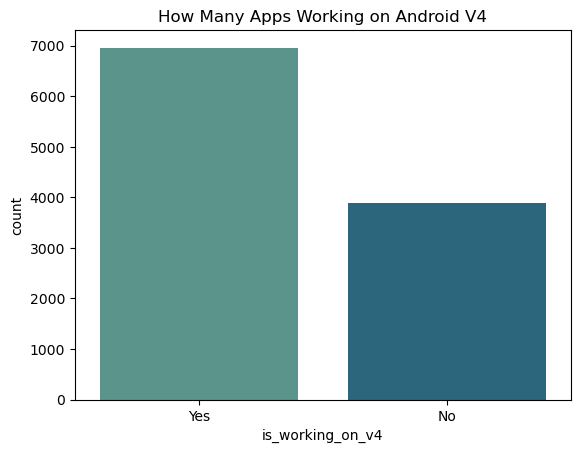

In [73]:
# Visualize to make it more clear 
sns.countplot(x="is_working_on_v4",
              data = df,
              palette= "crest")

plt.title("How Many Apps Working on Android V4")
plt.show()

So there are `6961` Apps are working on Android V4